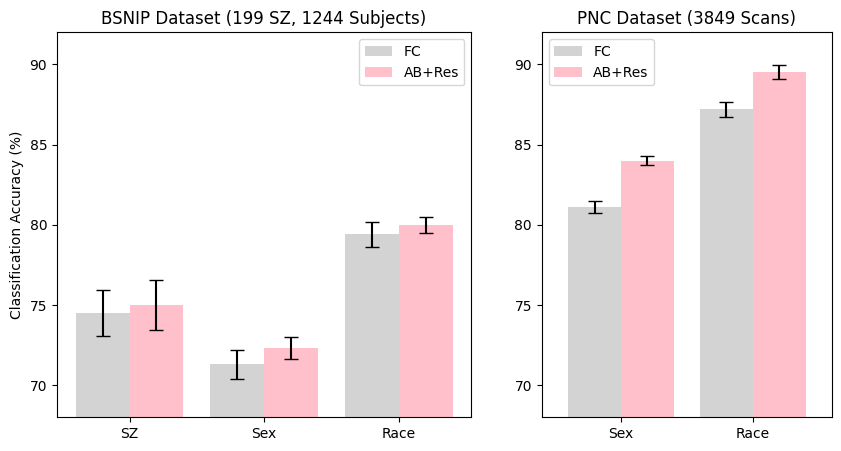

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

color='lightgray'
dashcolor = 'black'

fig, ax = plt.subplots(1,2,figsize=(10,5),gridspec_kw={'width_ratios':[3,2.1]})

ax[0].bar([-.2,0.8,1.8],[74.5,71.3,79.4],
          tick_label=['SZ', 'Sex', 'Race'], #, 'Sex', 'Race'],
          yerr=np.array([4.5,2.8,2.5])/sqrt(10),
          color='lightgray',
          width=0.4,
          label='FC',
          capsize=5)

ax[0].bar([.2,1.2,2.2],[75,72.3,80],
          yerr=np.array([5,2.2,1.6])/sqrt(10),
          color='pink',
          width=0.4,
          label='AB+Res',
          capsize=5)

ax[0].bar([0,1,2],[0,0,0],tick_label=['SZ', 'Sex', 'Race'])

ax[0].set_ylabel('Classification Accuracy (%)')
ax[0].set_ylim([68,92])
ax[0].legend()
ax[0].set_title('BSNIP Dataset (199 SZ, 1244 Subjects)')

ax[1].bar([0,1],[0,0],tick_label=['Sex', 'Race'])

ax[1].bar([-.2,0.8],[81.1,87.2],
          yerr=np.array([1.2,1.5])/sqrt(10),
          color='lightgray',
          width=0.4,
          label='FC',
          capsize=5)

ax[1].bar([.2,1.2],[84,89.5],
          yerr=np.array([0.9,1.4])/sqrt(10),
          color='pink',
          width=0.4,
          label='AB+Res',
          capsize=5)

ax[1].set_ylim([68,92])
ax[1].set_xlim([-0.6,1.6])
ax[1].legend()
ax[1].set_title('PNC Dataset (3849 Scans)')

fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/AngleBasis/ClassificationResults.pdf')

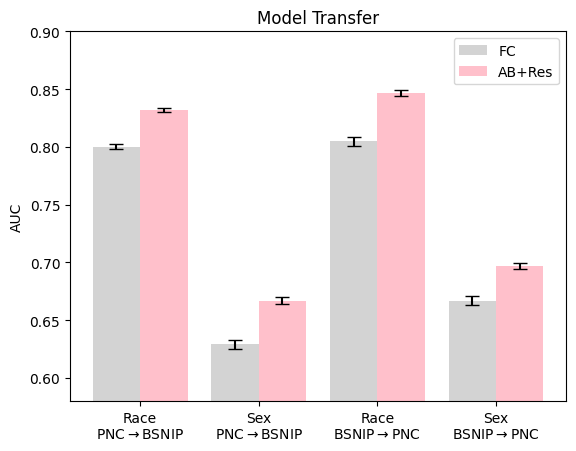

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

fig, ax = plt.subplots()

ax.bar([-0.2, 0.8, 1.8, 2.8], [.800, .629, .805, .667], 
       yerr=np.array([0.0097, 0.0189, 0.0182, 0.0166])/sqrt(20),
       width=0.4, color='lightgray', label='FC', capsize=5)
ax.bar([0.2, 1.2, 2.2, 3.2], [.832, .667, .847, .697], 
       yerr=np.array([0.0088,  0.0128, 0.0117, 0.0127])/sqrt(20),
       width=0.4, color='pink', label='AB+Res', capsize=5)

ax.set_ylim([.58, .90])
ax.set_ylabel('AUC')
ax.set_title('Model Transfer')
ax.legend()

ax.bar([0,1,2,3],[0,0,0,0],tick_label=['Race\nPNC$\\rightarrow$BSNIP', 
                                       'Sex\nPNC$\\rightarrow$BSNIP',  
                                       'Race\nBSNIP$\\rightarrow$PNC',
                                       'Sex\nBSNIP$\\rightarrow$PNC'])

fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/AngleBasis/TransferResults.pdf')

[[1.       0.924024]
 [0.924024 1.      ]]


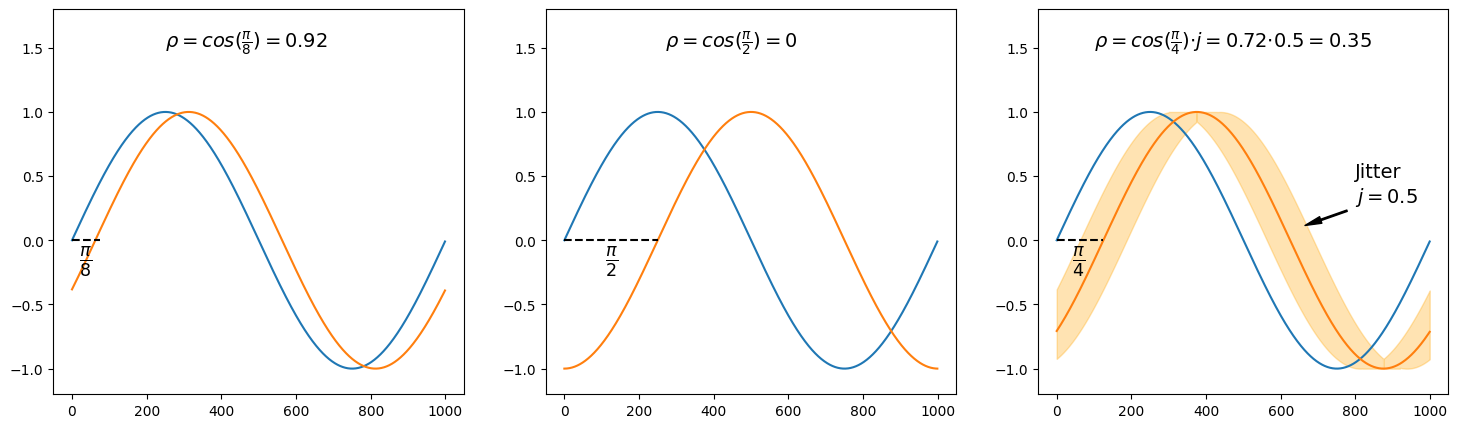

In [41]:
import matplotlib.pyplot as plt
import numpy as np

s0 = np.sin(np.arange(1000)/1000*2*3.14)
s1 = np.sin(np.arange(1000)/1000*2*3.14-3.14/8)
s2 = np.sin(np.arange(1000)/1000*2*3.14-3.14/8)
s3 = np.sin(np.arange(1000)/1000*2*3.14-3.14/8*3)

s2[300:375] = 1
s3[375:430] = 1

s2[820:875] = -1
s3[875:920] = -1

rho = np.corrcoef(np.stack([s0,s1]))
print(rho)

fig, ax = plt.subplots(1,3,figsize=(18,5))

ax[0].plot(s0)
ax[0].plot(s1)
# plt.fill_between(np.arange(1000),s2,s3,color='orange',alpha=0.3)
ax[0].set_ylim([-1.2,1.8])
ax[0].plot([0,75],[0,0],linestyle='--',color='black')

ax[0].text(250,1.5,'$\\rho=cos(\\frac{\\pi}{8})=0.92$', fontsize=14)
ax[0].text(20,-0.2,'$\\frac{\\pi}{8}$', fontsize=18)

s1 = np.sin(np.arange(1000)/1000*2*3.14-3.14/2)
ax[1].plot(s0)
ax[1].plot(s1)
ax[1].set_ylim([-1.2,1.8])
ax[1].plot([0,250],[0,0],linestyle='--',color='black')

ax[1].text(270,1.5,'$\\rho=cos(\\frac{\\pi}{2})=0$', fontsize=14)
ax[1].text(110,-0.2,'$\\frac{\\pi}{2}$', fontsize=18)

s1 = np.sin(np.arange(1000)/1000*2*3.14-3.14/4)
ax[2].plot(s0)
ax[2].plot(s1)
ax[2].fill_between(np.arange(1000),s2,s3,color='orange',alpha=0.3)
ax[2].set_ylim([-1.2,1.8])
ax[2].plot([0,125],[0,0],linestyle='--',color='black')

ax[2].text(100,1.5,'$\\rho=cos(\\frac{\\pi}{4}){\\cdot}j=0.72{\\cdot}0.5=0.35$', fontsize=14)
ax[2].text(40,-0.2,'$\\frac{\\pi}{4}$', fontsize=18)
ax[2].annotate('Jitter\n$j=0.5$', (650,0.1), xytext=(800,0.3), arrowprops=dict(facecolor='black', 
                                                                       width=1, headwidth=5, shrink=0.1), 
               fontsize=14)

# plt.text(75,1.5,'$\\rho=cos(\\pi/4){\\cdot}j=0.71{\\cdot}0.5=0.35$', fontsize=18)
# plt.text(325,1.2,'Jitter: $j=0.5$', fontsize=18)

fig.show()
plt.savefig('/home/anton/Documents/Tulane/Research/Work/AngleBasis/ExplanationBase.pdf')
